In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

array_bins = [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]


array_balls = [10, 20, 50, 100, 500, 1000, 10000, 100000]

In [ ]:
for bins in array_bins:
    for balls in array_balls:
        subprocess.run(["./galtonBoard", str(bins), str(balls)])

In [79]:
def pdf_normal(x,t_bins):
    mean = t_bins / 2.0
    variance = t_bins / 4.0
    return  1 / (np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))


def calculate_mse(data, t_bins, t_balls):
    mse = 0
    for i, row in data.iterrows():
        probability_i = row['balls'] / t_balls
        mse += np.power((pdf_normal(i, t_bins) - probability_i), 2) 

    return mse/t_bins  

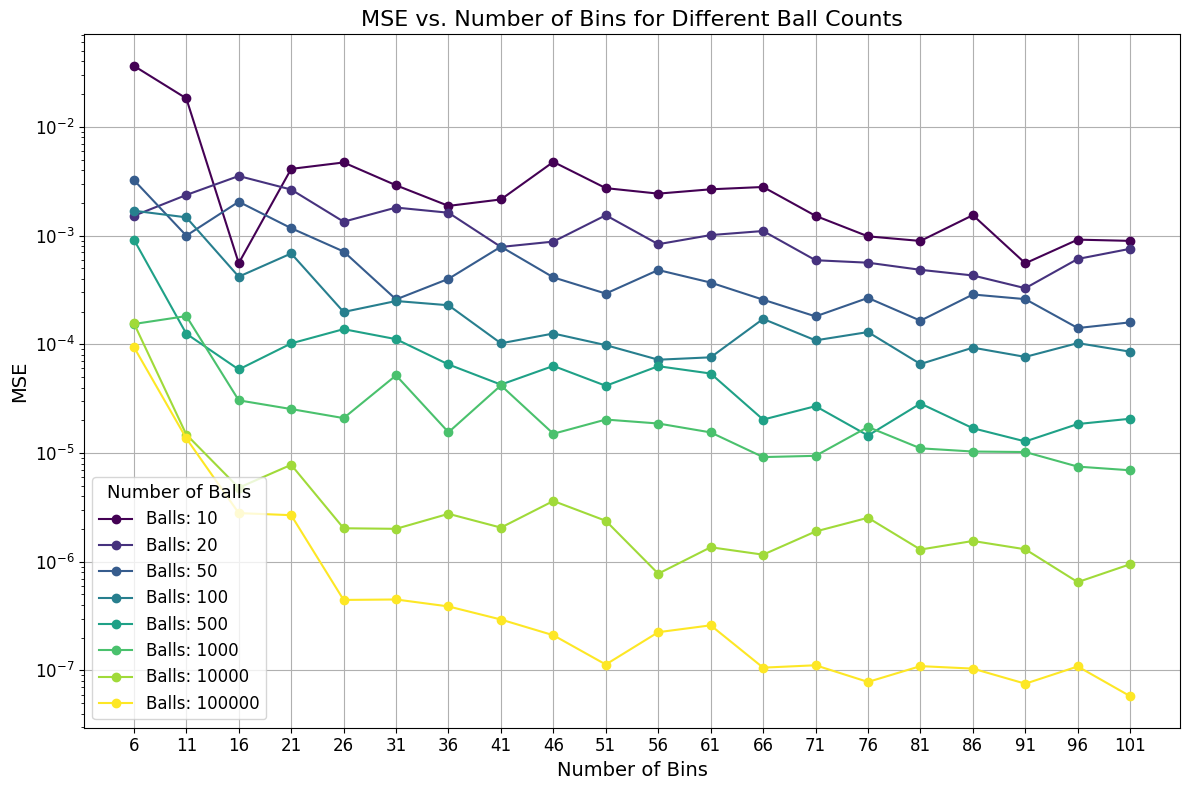

In [102]:
def plot_3d_mse():
    mse_data = {balls: [] for balls in array_balls}

    for bins in array_bins:
        for balls in array_balls:

            file_path = f"Simulations/simulation_{bins}_{balls}.csv"     
            data = pd.read_csv(file_path)
            
            mse = calculate_mse(data, bins-1, balls)
            mse_data[balls].append((bins, mse))

    plt.figure(figsize=(12, 8))  
    colors = plt.cm.viridis(np.linspace(0, 1, len(array_balls)))

    for i, balls in enumerate(array_balls):
        bins, mse = zip(*mse_data[balls])
        plt.plot(bins, mse, label=f'Balls: {balls}', color=colors[i], marker='o')


    plt.xlabel('Number of Bins', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.xticks(array_bins)
    plt.yscale('log')
    plt.title('MSE vs. Number of Bins for Different Ball Counts', fontsize=16)
    plt.grid(True)
    plt.legend(title="Number of Balls", fontsize=12, title_fontsize='13')
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Show the plot
    plt.tight_layout()
    plt.savefig("plot.pdf",dpi=800,bbox_inches="tight")
    plt.show()


plot_3d_mse()